# MNIST Dataset

## 1.LeNet-5 Architecture

Epoch 1/10


C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7279 - loss: 0.9327 - val_accuracy: 0.9430 - val_loss: 0.1904
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9514 - loss: 0.1612 - val_accuracy: 0.9686 - val_loss: 0.1037
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9697 - loss: 0.1003 - val_accuracy: 0.9752 - val_loss: 0.0838
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9770 - loss: 0.0756 - val_accuracy: 0.9794 - val_loss: 0.0660
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9816 - loss: 0.0607 - val_accuracy: 0.9809 - val_loss: 0.0642
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9839 - loss: 0.0517 - val_accuracy: 0.9821 - val_loss: 0.0601
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9875 - loss: 0.0415 - val_accuracy: 0.9838 - val_loss: 0.0538
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9873 - loss: 0.0374 - val_accuracy: 0.

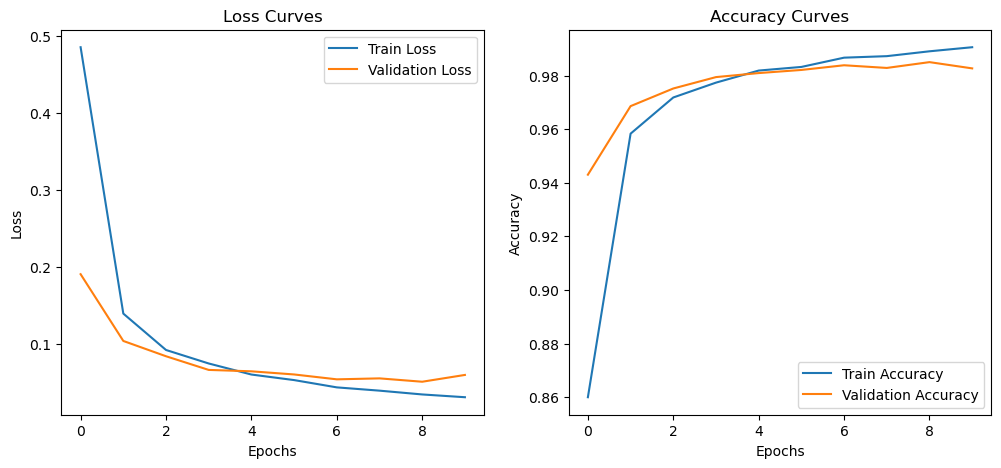

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)


def LeNet():
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
        AveragePooling2D(pool_size=(2, 2)),  # Fixed: Added pool_size=(2,2)
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),  # Fixed: Added pool_size=(2,2)
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = LeNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))

# Save the results
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}


# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 2.AlexNet Architecture

C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.6809 - loss: 0.8757 - val_accuracy: 0.9793 - val_loss: 0.0732
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.9817 - loss: 0.0694 - val_accuracy: 0.9840 - val_loss: 0.0619
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 458s 1s/step - accuracy: 0.9860 - loss: 0.0516 - val_accuracy: 0.9876 - val_loss: 0.0516
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.9901 - loss: 0.0367 - val_accuracy: 0.9890 - val_loss: 0.0473
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 407s 1s/step - accuracy: 0.9901 - loss: 0.0412 - val_accuracy: 0.9868 - val_loss: 0.0539
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.9907 - loss: 0.0364 - val_accuracy: 0.9867 - val_loss: 0.0610
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.9935 - loss: 0.0252 - val_accuracy: 0.9883 - val_loss: 0.0567
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.9946 - loss: 0.0222 - val_accu

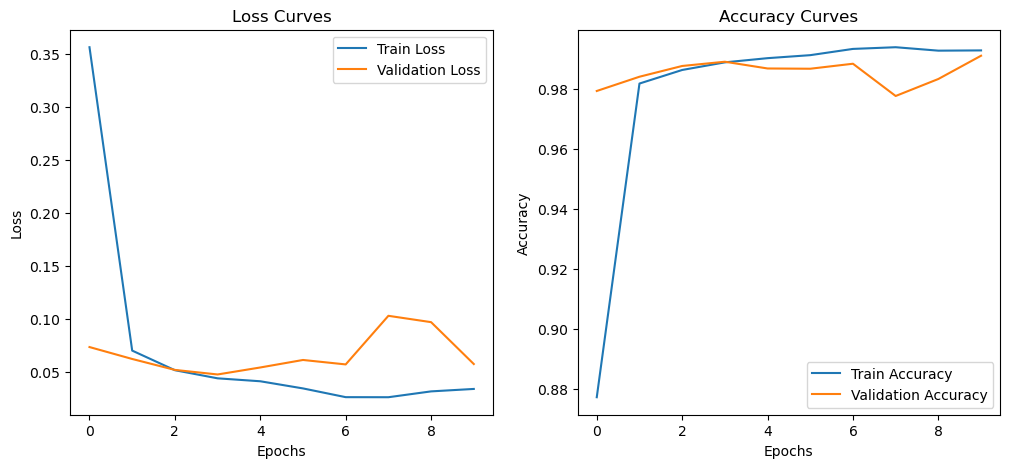

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Define the AlexNet architecture
def AlexNet():
    model = Sequential([
        Conv2D(96, kernel_size=(11, 11), strides=1, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Conv2D(256, kernel_size=(5, 5), strides=1, activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Conv2D(384, kernel_size=(3, 3), strides=1, activation='relu', padding="same"),
        Conv2D(384, kernel_size=(3, 3), strides=1, activation='relu', padding="same"),
        Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = AlexNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))

# Save the results
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 3.Googlenet Architecture

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step - accuracy: 0.3478 - loss: 1.6454 - val_accuracy: 0.9668 - val_loss: 0.1228
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.9699 - loss: 0.1181 - val_accuracy: 0.9750 - val_loss: 0.0968
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.9804 - loss: 0.0743 - val_accuracy: 0.9858 - val_loss: 0.0589
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.9867 - loss: 0.0545 - val_accuracy: 0.9792 - val_loss: 0.0795
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.9886 - loss: 0.0460 - val_accuracy: 0.9882 - val_loss: 0.0644
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 606s 2s/step - accuracy: 0.9902 - loss: 0.0425 - val_accuracy: 0.9883 - val_loss: 0.0528
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 692s 2s/step - accuracy: 0.9905 - loss: 0.0402 - val_accuracy: 0.9841 - val_loss: 0.0764
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 745s 2s/step - accuracy: 0.9906 - loss: 0.0406 - val_accu

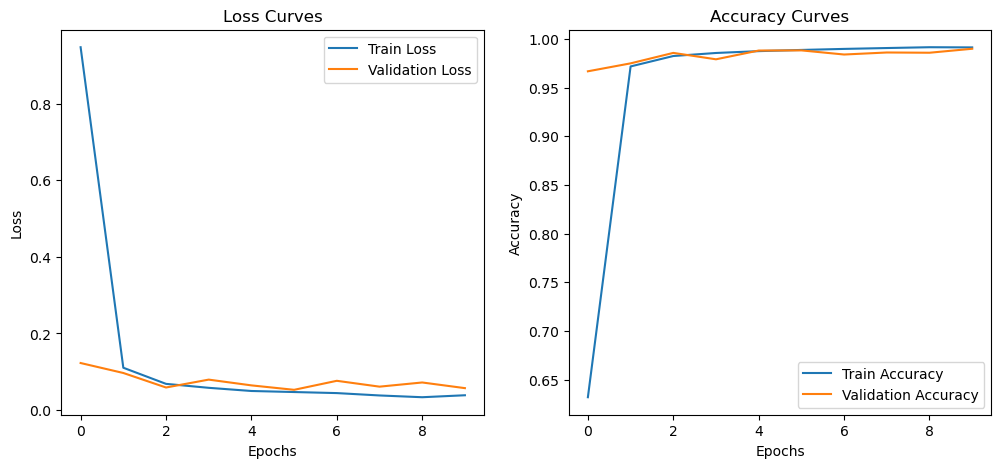

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Input, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Define the Inception module
def inception_module(x, filters):
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)
    conv5x5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(pool_proj)
    
    return concatenate([conv1x1, conv3x3, conv5x5, pool_proj], axis=-1)

# Define the GoogleNet architecture
def GoogleNet():
    input_layer = Input(shape=(28, 28, 1))
    
    x = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    x = inception_module(x, [64, 128, 32, 32])
    x = inception_module(x, [128, 192, 96, 64])
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    x = inception_module(x, [192, 208, 48, 64])
    x = inception_module(x, [160, 224, 64, 64])
    x = inception_module(x, [128, 256, 64, 64])
    x = inception_module(x, [112, 288, 64, 64])
    x = inception_module(x, [256, 320, 128, 128])
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(10, activation='softmax')(x)
    
    model = Model(input_layer, x)
    return model

# Compile the model
model = GoogleNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))

# Save the results
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 4.VGGNet Architecture

C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 535s 1s/step - accuracy: 0.7728 - loss: 0.6532 - val_accuracy: 0.9827 - val_loss: 0.0592
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 528s 1s/step - accuracy: 0.9823 - loss: 0.0633 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.9885 - loss: 0.0404 - val_accuracy: 0.9888 - val_loss: 0.0455
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 565s 1s/step - accuracy: 0.9913 - loss: 0.0322 - val_accuracy: 0.9895 - val_loss: 0.0358
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.9914 - loss: 0.0290 - val_accuracy: 0.9862 - val_loss: 0.0490
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 525s 1s/step - accuracy: 0.9915 - loss: 0.0284 - val_accuracy: 0.9893 - val_loss: 0.0403
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - accuracy: 0.9945 - loss: 0.0207 - val_accuracy: 0.9939 - val_loss: 0.0270
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.9947 - loss: 0.0176 - val_accu

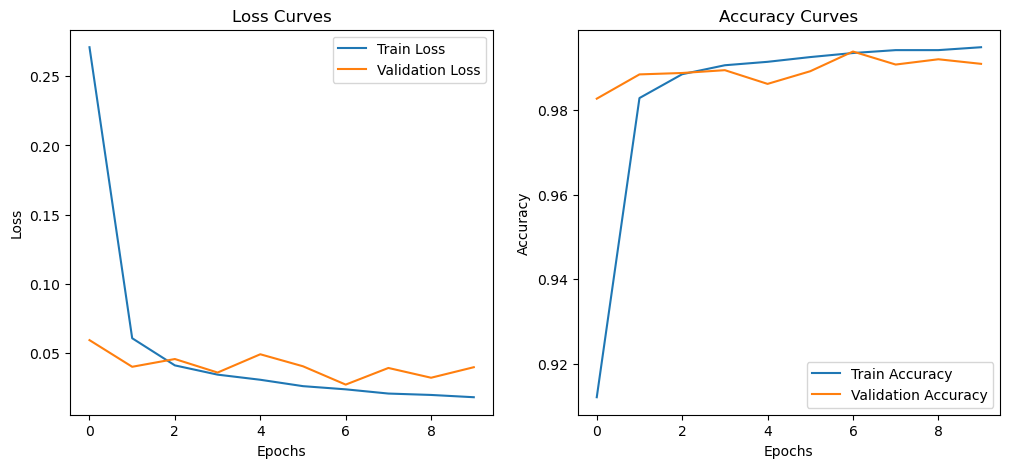

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Define the VGGNet-16 architecture
def VGGNet():
    model = Sequential([
        # Block 1
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),

        # Block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),

        # Block 3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),

        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Output layer (10 classes)
    ])
    return model

# Compile the model
model = VGGNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))

# Save the results
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 5.ResNet Architecture

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1712s 5s/step - accuracy: 0.8988 - loss: 0.3234 - val_accuracy: 0.1604 - val_loss: 6.0782
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1159s 3s/step - accuracy: 0.9859 - loss: 0.0443 - val_accuracy: 0.9714 - val_loss: 0.0919
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1160s 3s/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9648 - val_loss: 0.1217
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1125s 3s/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9772 - val_loss: 0.0898
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1405s 4s/step - accuracy: 0.9933 - loss: 0.0206 - val_accuracy: 0.8863 - val_loss: 0.5285
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1614s 4s/step - accuracy: 0.9952 - loss: 0.0148 - val_accuracy: 0.9850 - val_loss: 0.0489
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1092s 3s/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9844 - val_loss: 0.0509
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1097s 3s/step - accuracy: 0.9957 - loss: 0.0129 - 

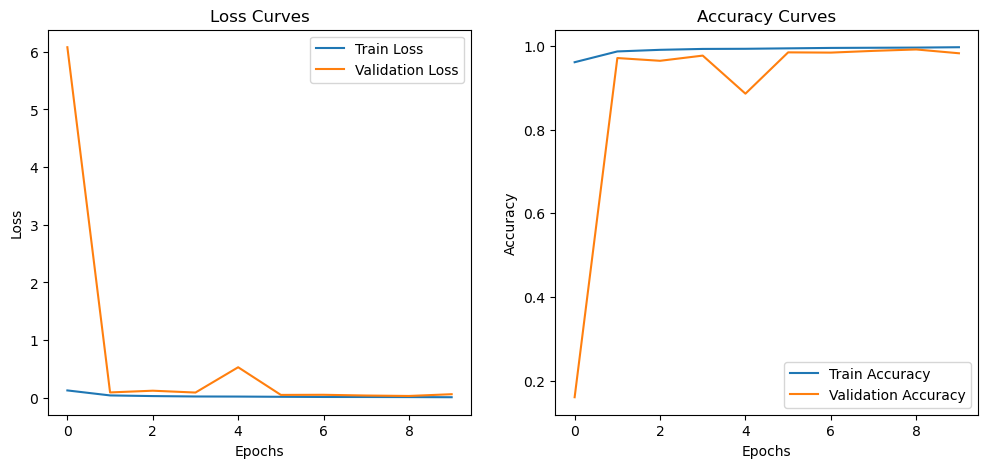

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, Input

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Define a Residual Block with Shortcut Projection
def residual_block(x, filters, downsample=False):
    shortcut = x  # Store original input for skip connection

    # First Conv Layer
    x = Conv2D(filters, (3, 3), padding='same', strides=(2 if downsample else 1), activation=None)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second Conv Layer
    x = Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    # Adjust shortcut connection when downsampling or changing filter size
    if downsample or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=(2 if downsample else 1), padding='same', activation=None)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut connection
    x = Add()([x, shortcut])  
    x = ReLU()(x)
    return x

# Define the ResNet architecture
def ResNet():
    input_layer = Input(shape=(28, 28, 1))

    x = Conv2D(64, (3, 3), padding='same', activation=None)(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Adding Residual Blocks with Downsampling
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 256)

    # Global Average Pooling instead of Flattening
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation='softmax')(x)  # Output layer (10 classes)

    model = Model(input_layer, x)
    return model

# Compile the model
model = ResNet()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))


# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 6.Xception Architecture

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 249s 607ms/step - accuracy: 0.9189 - loss: 0.2573 - val_accuracy: 0.1060 - val_loss: 5.1312
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 260s 603ms/step - accuracy: 0.9885 - loss: 0.0359 - val_accuracy: 0.9357 - val_loss: 0.2184
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 226s 602ms/step - accuracy: 0.9919 - loss: 0.0228 - val_accuracy: 0.9756 - val_loss: 0.0957
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 273s 631ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.9845 - val_loss: 0.0575
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 251s 602ms/step - accuracy: 0.9953 - loss: 0.0142 - val_accuracy: 0.9822 - val_loss: 0.0660
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 225s 599ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9699 - val_loss: 0.1145
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 262s 599ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9891 - val_loss: 0.0428
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 272s 627ms/step - accuracy: 0.9968 -

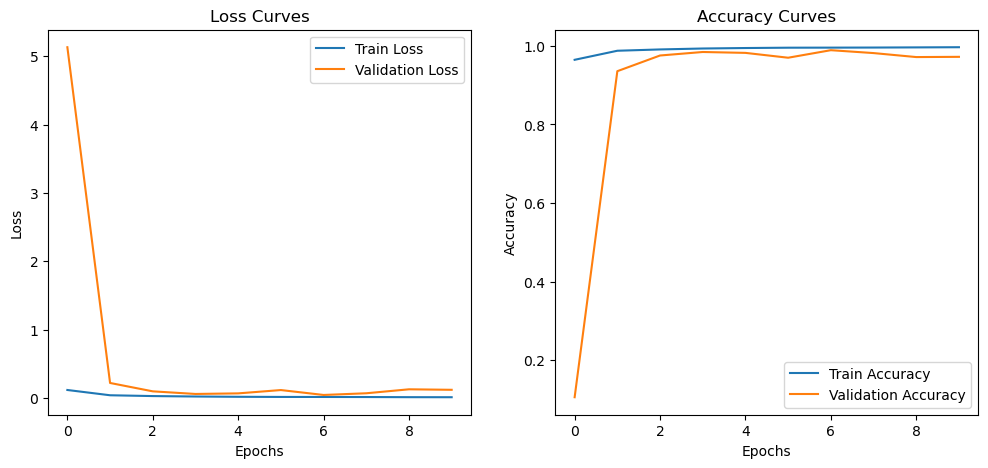

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (SeparableConv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D,
                                     Dense, Input, Conv2D, MaxPooling2D)

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Separable Residual Block with Shortcut Projection
def separable_residual_block(x, filters, downsample=False):
    shortcut = x  # Save input for residual connection

    # First Depthwise Separable Convolution
    x = SeparableConv2D(filters, (3, 3), padding='same', strides=(2 if downsample else 1), activation=None)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second Depthwise Separable Convolution
    x = SeparableConv2D(filters, (3, 3), padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    # Adjust shortcut when downsampling or filter size changes
    if downsample or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=(2 if downsample else 1), padding='same', activation=None)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add Residual Connection
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Define the Xception architecture
def Xception():
    input_layer = Input(shape=(28, 28, 1))

    # Initial Convolution Block
    x = Conv2D(64, (3, 3), padding='same', activation=None)(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # First separable block with downsampling
    x = separable_residual_block(x, 128, downsample=True)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Second separable block with downsampling
    x = separable_residual_block(x, 256, downsample=True)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Third separable block
    x = separable_residual_block(x, 512)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation='softmax')(x)  # Output layer (10 classes)

    model = Model(input_layer, x)
    return model

# Compile and train the model
model = Xception()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))


# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()

## 7.SENet Architecture

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1709s 4s/step - accuracy: 0.9070 - loss: 0.3150 - val_accuracy: 0.5062 - val_loss: 1.5077
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1269s 3s/step - accuracy: 0.9878 - loss: 0.0389 - val_accuracy: 0.9835 - val_loss: 0.0558
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1143s 3s/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.9582 - val_loss: 0.1218
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1147s 3s/step - accuracy: 0.9926 - loss: 0.0219 - val_accuracy: 0.9870 - val_loss: 0.0457
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1117s 3s/step - accuracy: 0.9950 - loss: 0.0168 - val_accuracy: 0.9768 - val_loss: 0.0820
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2320s 6s/step - accuracy: 0.9969 - loss: 0.0100 - val_accuracy: 0.9875 - val_loss: 0.0446
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2807s 7s/step - accuracy: 0.9959 - loss: 0.0135 - val_accuracy: 0.9847 - val_loss: 0.0542
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1106s 3s/step - accuracy: 0.9968 - loss: 0.0099 - 

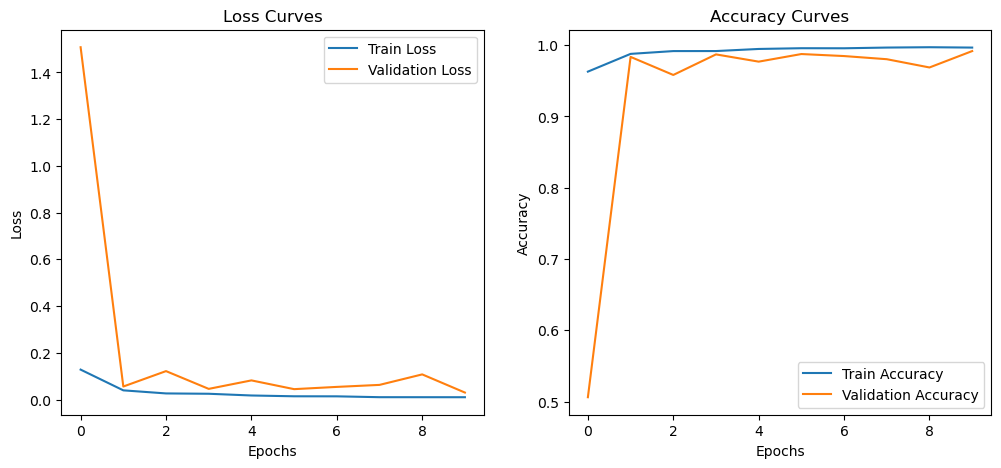

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D,
                                     Dense, Input, Reshape, Multiply)

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Squeeze-and-Excitation Block
def se_block(x, filters, ratio=16):
    se = GlobalAveragePooling2D()(x)  # Squeeze (Global pooling)
    se = Dense(filters // ratio, activation='relu')(se)  # Excitation (Bottleneck FC layer)
    se = Dense(filters, activation='sigmoid')(se)  # Scaling factor
    se = Reshape((1, 1, filters))(se)  # Reshape to match input
    x = Multiply()([x, se])  # Scale input feature maps
    return x

# Residual Block with SE Block
def se_residual_block(x, filters, downsample=False):
    shortcut = x  # Save input for residual connection

    # First Conv Layer
    x = Conv2D(filters, (3, 3), padding='same', strides=(2 if downsample else 1), activation=None)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second Conv Layer
    x = Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    # Squeeze-and-Excitation Block
    x = se_block(x, filters)

    # Adjust shortcut connection when downsampling or changing filter size
    if downsample or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=(2 if downsample else 1), padding='same', activation=None)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut connection
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Define the SENet architecture
def SENet():
    input_layer = Input(shape=(28, 28, 1))

    x = Conv2D(64, (3, 3), padding='same', activation=None)(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Adding SE Residual Blocks with Downsampling
    x = se_residual_block(x, 64)
    x = se_residual_block(x, 64)

    x = se_residual_block(x, 128, downsample=True)
    x = se_residual_block(x, 128)

    x = se_residual_block(x, 256, downsample=True)
    x = se_residual_block(x, 256)

    # Global Average Pooling instead of Flattening
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation='softmax')(x)  # Output layer (10 classes)

    model = Model(input_layer, x)
    return model

# Compile the model
model = SENet()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))


# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()
